In [42]:
import pandas_datareader.data as web
import datetime
from alive_progress import alive_bar
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import pyfolio as pf
#import zipline
import pytz
plt.rcParams["figure.figsize"] = (20,5)

In [41]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2022,1,1)

In [44]:
from tqdm import tqdm 

### Divers Backtests sur 6 ans

#### Pesos Chilien // Cuivre et Pésos Chilien vs Global X Copper Miners ETF

In [3]:
clp = web.DataReader('CLPUSD=X',"yahoo",start,end)["Close"]
cop = web.DataReader('HG=F',"yahoo",start,end)["Close"]
cpx = web.DataReader('COPX',"yahoo",start,end)["Close"]

signall = cpx.diff().shift(1).dropna(axis=0) > 0
signals = -1 * (cpx.diff().shift(1).dropna(axis=0) < 0)
signal = signals + signall

pct = clp.pct_change().dropna()
res = pct*signal

print("Return on 6 years : "+ str(100*res.sum())+" %")
print("Sharpe at : "+ str((252*res.mean())/(res.std()*252**0.5)))

print("Win rate de la stratégie : " + str(100*len(res[res>0])/len(res.dropna()))[:6]+ " %")
print("R:R ratio at : " + str(res[res>0].mean()/-res[res<0].mean())[:6])

Return on 6 years : 13504.756394248114 %
Sharpe at : 0.41301936075722323
Win rate de la stratégie : 57.860 %
R:R ratio at : 23.388


#### Dollar canadien vs WTI et divers ETF d'exploitation/raffinage d'hydrocaarbures  

In [6]:
cad = web.DataReader('CADUSD=X',"yahoo",start,end)["Close"]
wti = web.DataReader('CL=F',"yahoo",start,end)["Close"]
xop = web.DataReader('OIH',"yahoo",start,end)["Close"]
pxe = web.DataReader('PXE',"yahoo",start,end)["Close"]
mvis = web.DataReader('MVIS',"yahoo",start,end)["Close"]
crk = web.DataReader('CRAK',"yahoo",start,end)["Close"]
xdw = web.DataReader('XDW0.MI',"yahoo",start,end)["Close"]
#signall = (wti.diff().shift(1).dropna(axis=0) > 0)*(xop.diff().shift(1).dropna(axis=0) > 0)
#signals = -1 * ((wti.diff().shift(1).dropna(axis=0) < 0)*(xop.diff().shift(1).dropna(axis=0) < 0))
signall = (wti.diff().shift(1).dropna(axis=0) > 0)
signals = -1 * ((wti.diff().shift(1).dropna(axis=0) < 0))
signal = signals + signall

pct = cad.pct_change().dropna()
res = pct*signal

print("Return on 6 years : "+ str(100*res.sum())+" %")
print("Sharpe at : "+ str((252*res.mean())/(res.std()*252**0.5)))

print("Win rate de la stratégie : " + str(100*len(res[res>0])/len(res.dropna()))[:6]+ " %")
print("R:R ratio at : " + str(res[res>0].mean()/-res[res<0].mean())[:6])

Return on 6 years : 120.40013479433709 %
Sharpe at : 2.624691213173347
Win rate de la stratégie : 57.833 %
R:R ratio at : 1.1281


In [49]:
SharpesVariate = pd.DataFrame(index=list(range(0,500,1)),columns=list(range(0,500,1)))
CumReturnVariate = pd.DataFrame(index=list(range(0,500,1)),columns=list(range(0,500,1)))
cad = web.DataReader('CADUSD=X',"yahoo",start,end)["Close"]
wti = web.DataReader('CL=F',"yahoo",start,end)["Close"]

for i in tqdm(range(0,300,1)):
    for j in range(0,300,1):


    #signall = (wti.diff().shift(1).dropna(axis=0) > 0)*(xop.diff().shift(1).dropna(axis=0) > 0)
    #signals = -1 * ((wti.diff().shift(1).dropna(axis=0) < 0)*(xop.diff().shift(1).dropna(axis=0) < 0))
        signall = (wti.diff().shift(1).dropna(axis=0) > i/100)
        signals = -1 * ((wti.diff().shift(1).dropna(axis=0) < -j/100))
        signal = signals + signall

        pct = cad.pct_change().dropna()
        res = pct*signal
        
        SharpesVariate.at[i,j]=(252*res.mean())/(res.std()*252**0.5)
        CumReturnVariate.at[i,j]=100*res.sum()

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [04:44<00:00,  1.05it/s]


In [ ]:
Sharpe3d = pd.DataFrame(columns=[])

In [7]:
from scipy.stats import shapiro
from scipy.stats import normaltest

In [11]:
res.dropna()

Date
2015-01-06   -0.003062
2015-01-07    0.006758
2015-01-08    0.001565
2015-01-09   -0.000752
2015-01-12    0.001427
                ...   
2021-12-27    0.000773
2021-12-28    0.002112
2021-12-29   -0.002029
2021-12-30    0.002378
2021-12-31    0.002997
Name: Close, Length: 1551, dtype: float64

In [50]:
x = SharpesVariate.columns
y = SharpesVariate.index
X,Y = np.meshgrid(x,y)
Z = SharpesVariate

<IPython.core.display.Javascript object>


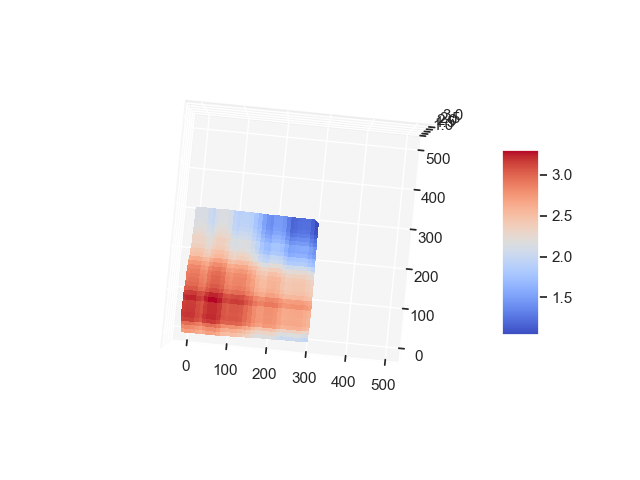

C:\Users\Hermes\AppData\Local\Temp\tmp2y2zb9dr\ipykernel_6252\3868181608.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink=0.5, aspect=5)


In [65]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from matplotlib import cm




fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('white')

# make the panes transparent


surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                   linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
plt.savefig("fig.png")

In [69]:
maxValueIndexObj = SharpesVariate.idxmax()


TypeError: reduction operation 'argmax' not allowed for this dtype

In [88]:
SharpesVariate.astype(float).idxmax()

0      88.0
1      88.0
2      88.0
3      88.0
4      88.0
       ... 
495     NaN
496     NaN
497     NaN
498     NaN
499     NaN
Length: 500, dtype: float64

In [89]:
SharpesVariate.T.astype(float).idxmax()

0      10.0
1      10.0
2      10.0
3      10.0
4      10.0
       ... 
495     NaN
496     NaN
497     NaN
498     NaN
499     NaN
Length: 500, dtype: float64

In [91]:
SharpesVariate.at[10,88]

2.6419534498991557

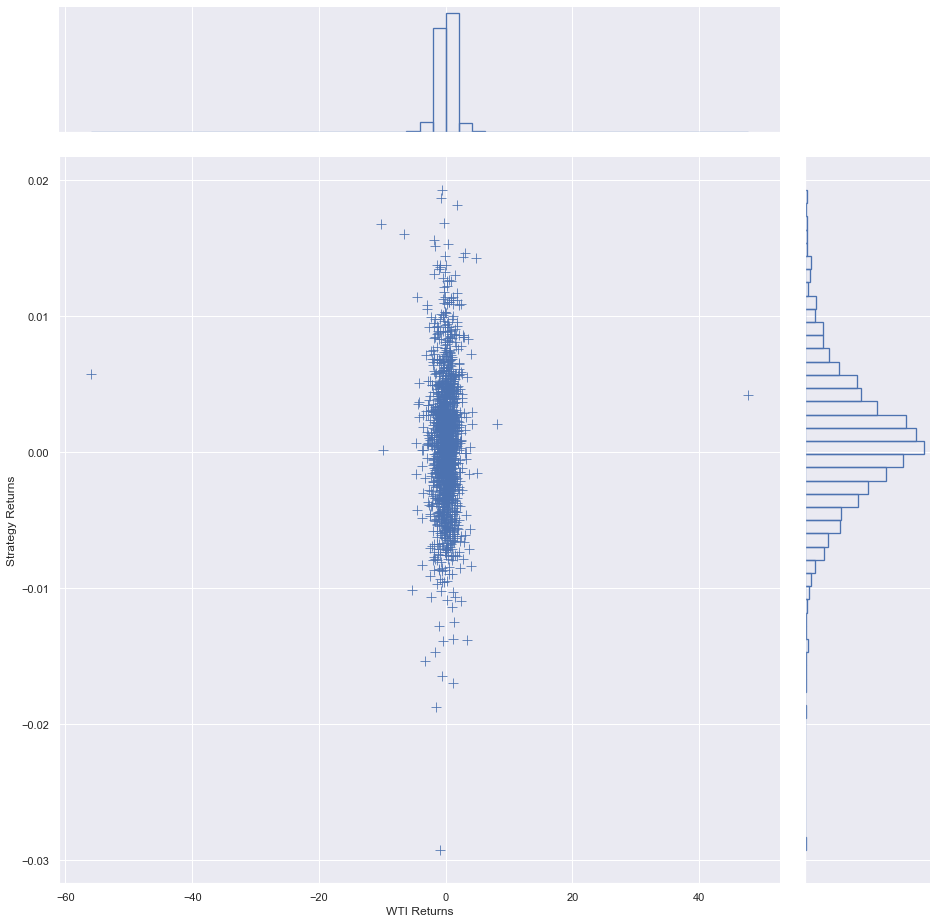

In [46]:
sns.jointplot(
    x=wti.diff().rename("WTI Returns"), y=res.rename("Strategy Returns"),
    marker="+",height=13, s=100, marginal_kws=dict(bins=50, fill=False),
)

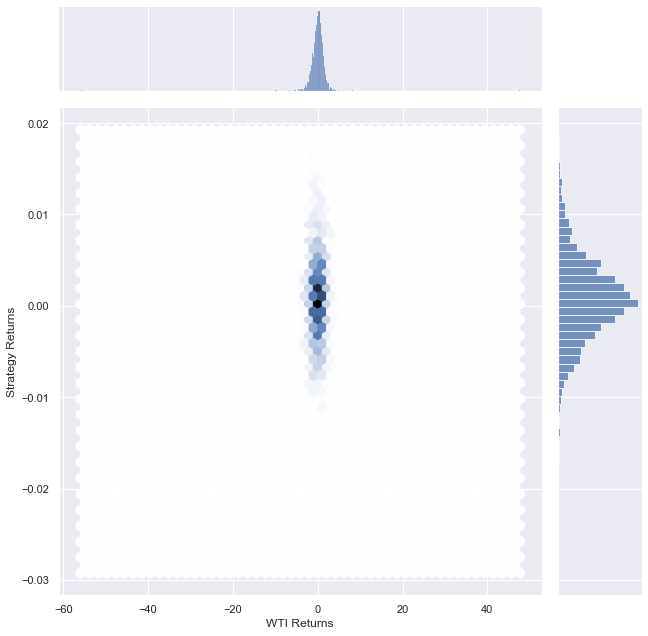

In [47]:
sns.jointplot(x=wti.diff().rename("WTI Returns"), y=res.rename("Strategy Returns"), kind="hex", palette="rocket_r", height=9)

C:\Users\Hermes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

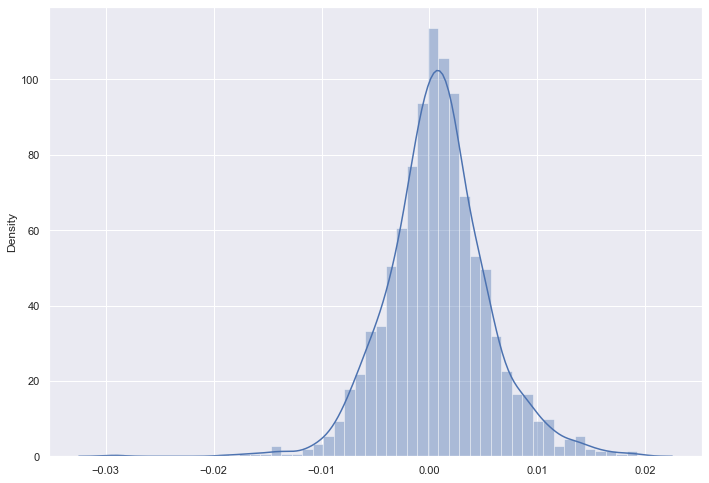

In [24]:
sns.distplot(res.dropna().to_numpy())

In [16]:
shapiro(res.dropna().to_numpy())

ShapiroResult(statistic=0.9799239635467529, pvalue=6.585895294831251e-14)

In [17]:
normaltest(res.dropna().to_numpy())

NormaltestResult(statistic=81.66688389001379, pvalue=1.8461266266613126e-18)

C:\Users\Hermes\anaconda3\lib\site-packages\pyfolio\timeseries.py:734: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2015-01-02
End date,2021-12-31
Total months,96
,Backtest
Annual return,15.852%
Cumulative returns,227.552%
Annual volatility,7.453%
Sharpe ratio,2.62
Calmar ratio,1.65
Stability,0.92
Max drawdown,-9.589%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,9.59,2015-05-27,2015-10-20,2015-12-17,147
1,8.04,2018-03-28,2018-11-02,2019-01-29,220
2,5.87,2019-04-08,2019-09-09,2020-02-03,216
3,5.61,2016-06-29,2016-11-10,2016-12-15,122
4,5.02,2020-04-27,2020-06-17,2020-12-09,163


C:\Users\Hermes\anaconda3\lib\site-packages\pyfolio\plotting.py:835: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\Hermes\anaconda3\lib\site-packages\pyfolio\plotting.py:835: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\Hermes\anaconda3\lib\site-packages\pyfolio\plotting.py:835: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


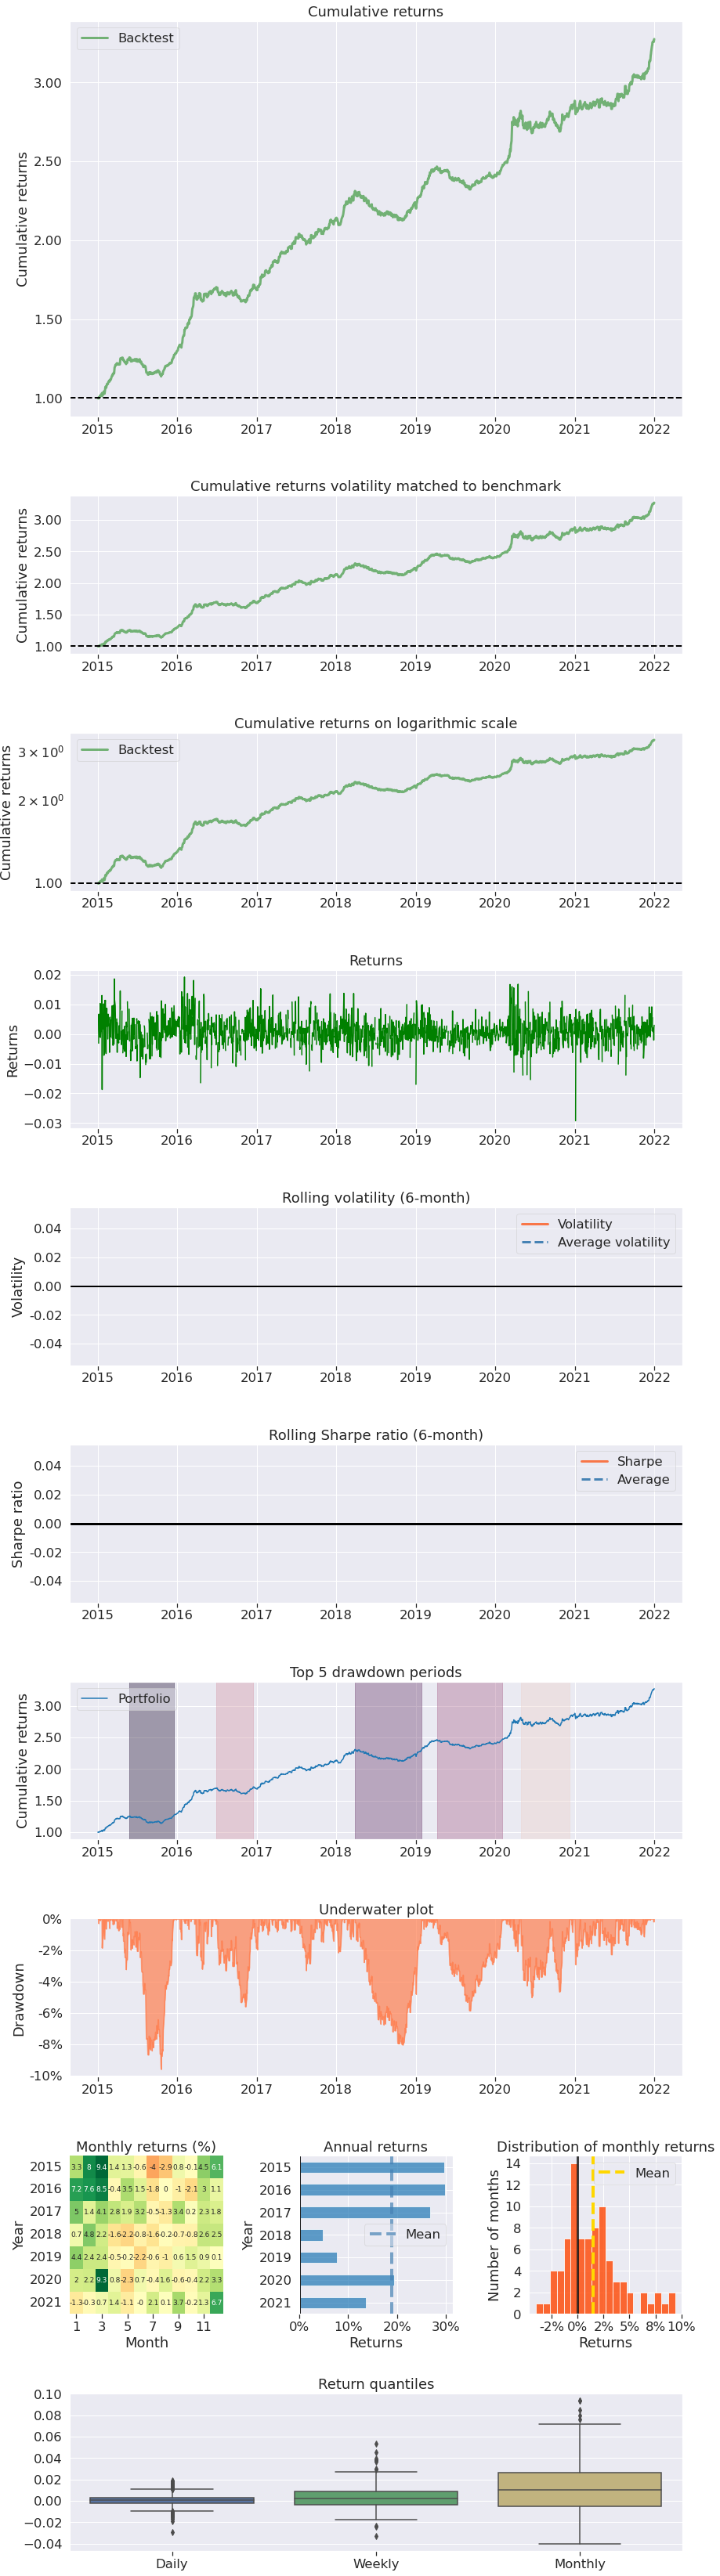

In [5]:
pf.create_returns_tear_sheet(res)

Meilleure performance sur le WTI

In [40]:
clp = web.DataReader('CLPUSD=X',"yahoo",start,end)["Close"]
cop = web.DataReader('HG=F',"yahoo",start,end)["Close"]
mvis = web.DataReader('MVIS',"yahoo",start,end)["Close"]

signall = mvis.diff().shift(1).dropna(axis=0) < 0
signals = -1 * (mvis.diff().shift(1).dropna(axis=0) > 0)
signal = signals + signall

pct = clp.pct_change().dropna()
res = pct*signal

print("Return on 6 years : "+ str(100*res.sum())+" %")
print("Sharpe at : "+ str((252*res.mean())/(res.std()*252**0.5)))

print("Win rate de la stratégie : " + str(100*len(res[res>0])/len(res.dropna()))[:6]+ " %")
print("R:R ratio at : " + str(res[res>0].mean()/-res[res<0].mean())[:6])

Return on 6 years : 13217.475527306406 %
Sharpe at : 0.40422774601958644
Win rate de la stratégie : 43.170 %
R:R ratio at : 29.612


In [4]:
eur = web.DataReader('EURUSD=X',"yahoo",start,end)["Close"]
cpi = web.DataReader('SPY',"yahoo",start,end)["Close"]

signall = cpi.diff().shift(1).dropna(axis=0) > 0
signals = -1 * (cpi.diff().shift(1).dropna(axis=0) < 0)
signal = signals + signall
pct = eur.pct_change().dropna()
res = pct*signal

print("Return on 6 years : "+ str(100*res.sum())+" %")
print("Sharpe at : "+ str((252*res.mean())/(res.std()*252**0.5)))

print("Win rate de la stratégie : " + str(100*len(res[res>0])/len(res.dropna()))[:6]+ " %")
print("R:R ratio at : " + str(res[res>0].mean()/-res[res<0].mean())[:6])

Return on 6 years : 19.336576639419945 %
Sharpe at : 0.3990081341443102
Win rate de la stratégie : 50.773 %
R:R ratio at : 1.0221


In [7]:
brl = web.DataReader('BRLUSD=X',"yahoo",start,end)["Close"]
bov = web.DataReader('^BVSP',"yahoo",start,end)["Close"]

signall = bov.diff().shift(1).dropna(axis=0) > 0
signals = -1 * (bov.diff().shift(1).dropna(axis=0) < 0)
signal = signals + signall
pct = brl.pct_change().dropna()
res = pct*signal

print("Return on 6 years : "+ str(100*res.sum())+" %")
print("Sharpe at : "+ str((252*res.mean())/(res.std()*252**0.5)))

print("Win rate de la stratégie : " + str(100*len(res[res>0])/len(res.dropna()))[:6]+ " %")
print("R:R ratio at : " + str(res[res>0].mean()/-res[res<0].mean())[:6])

Return on 6 years : 245.39525840795994 %
Sharpe at : 2.2785347012849404
Win rate de la stratégie : 54.826 %
R:R ratio at : 1.2065


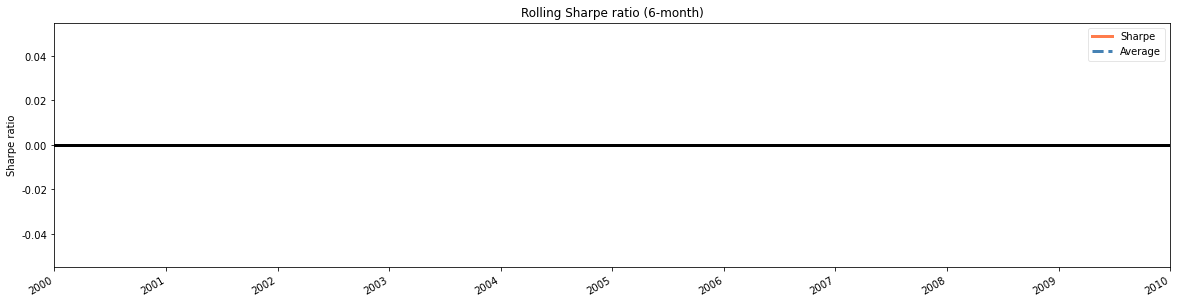

In [6]:
pf.plot_rolling_sharpe(res);

In [39]:
res.index = pd.to_datetime(res.index)

In [34]:
res.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=2032, freq=None)

In [54]:
res.tz_localize(pytz.utc)

Date
2015-01-02 00:00:00+00:00         NaN
2015-01-05 00:00:00+00:00         NaN
2015-01-06 00:00:00+00:00    0.034225
2015-01-07 00:00:00+00:00    0.036859
2015-01-08 00:00:00+00:00    0.008140
                               ...   
2021-12-27 00:00:00+00:00   -0.004228
2021-12-28 00:00:00+00:00    0.003422
2021-12-29 00:00:00+00:00    0.004188
2021-12-30 00:00:00+00:00    0.004157
2021-12-31 00:00:00+00:00    0.007467
Name: Close, Length: 2032, dtype: float64

In [56]:
res.tz_localize(pytz.utc)

Date
2015-01-02 00:00:00+00:00         NaN
2015-01-05 00:00:00+00:00         NaN
2015-01-06 00:00:00+00:00    0.034225
2015-01-07 00:00:00+00:00    0.036859
2015-01-08 00:00:00+00:00    0.008140
                               ...   
2021-12-27 00:00:00+00:00   -0.004228
2021-12-28 00:00:00+00:00    0.003422
2021-12-29 00:00:00+00:00    0.004188
2021-12-30 00:00:00+00:00    0.004157
2021-12-31 00:00:00+00:00    0.007467
Name: Close, Length: 2032, dtype: float64

C:\Users\Hermes\anaconda3\lib\site-packages\pyfolio\timeseries.py:734: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
C:\Users\Hermes\anaconda3\lib\site-packages\pyfolio\timeseries.py:734: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
C:\Users\Hermes\anaconda3\lib\site-packages\pyfolio\timeseries.py:734: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,9.17,2018-03-13,2018-08-30,2019-02-08,239
1,9.05,2016-04-04,2016-06-15,2016-09-06,112
2,9.04,2017-03-13,2017-06-13,2017-11-23,184
3,8.08,2021-02-08,2021-11-08,NaT,NaN
4,5.16,2020-03-25,2020-04-02,2020-06-10,56


IndexError: index -1 is out of bounds for axis 0 with size 0

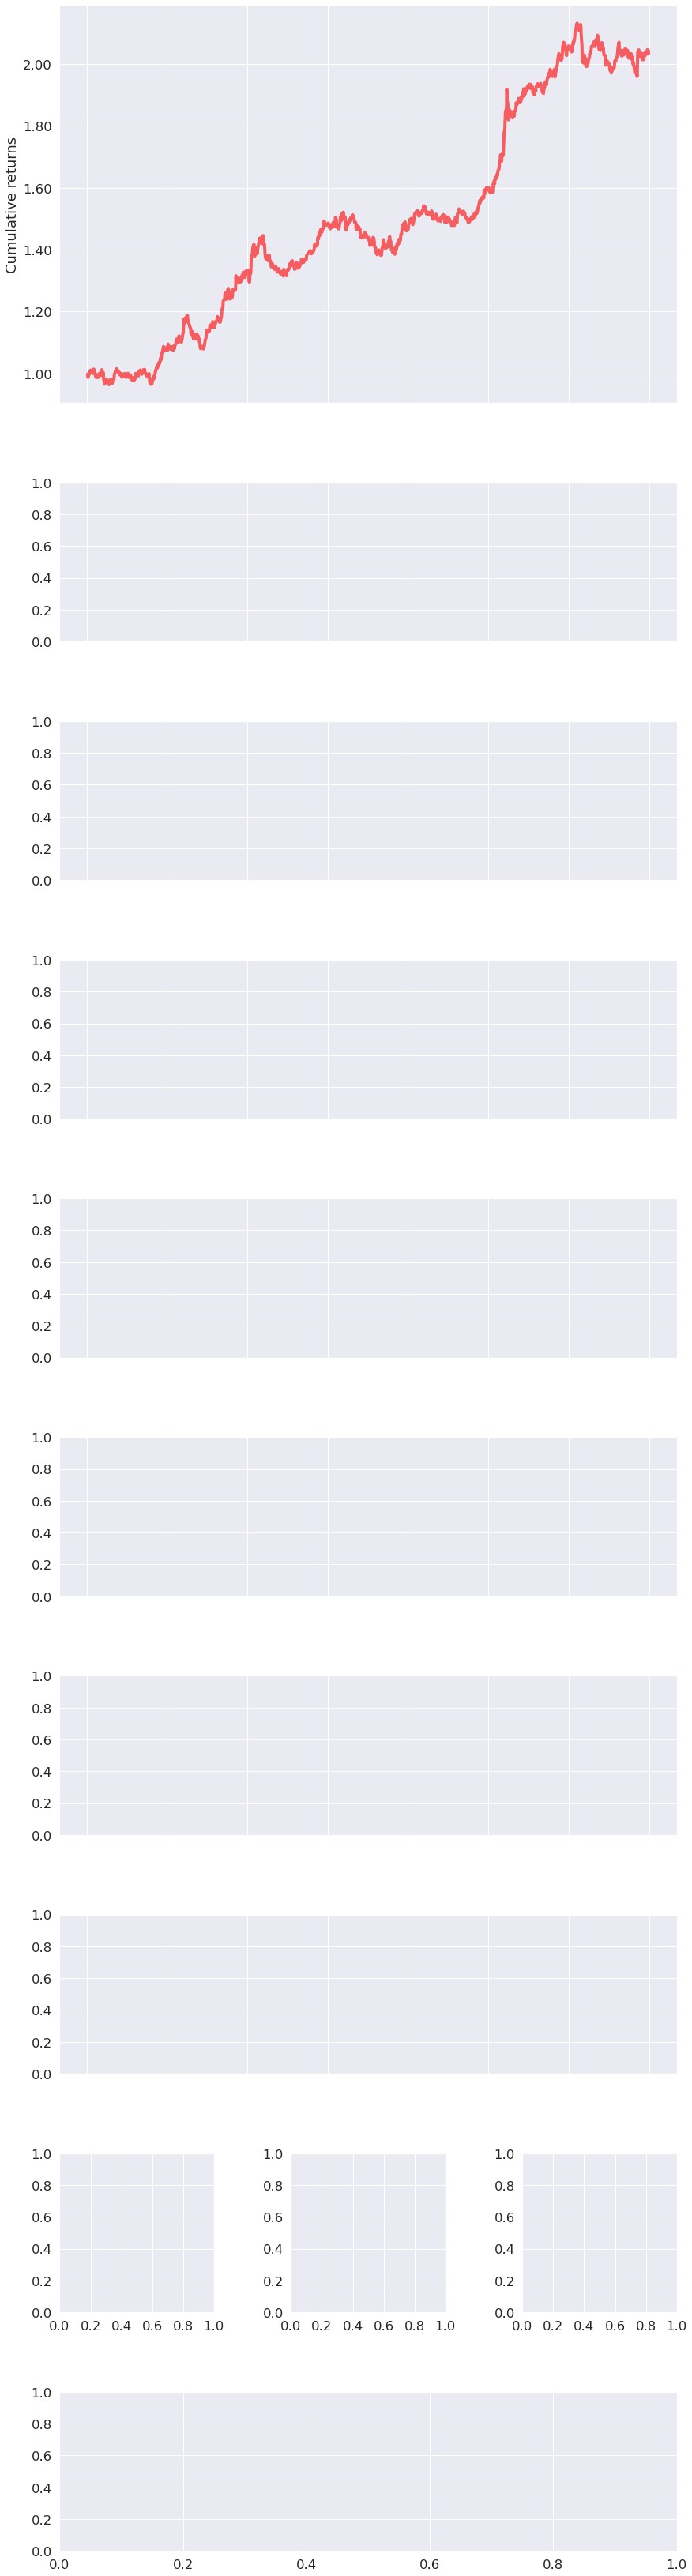

In [84]:
#pf.create_returns_tear_sheet(res,live_start_date=start )
#pf.timeseries.beta(res)

pf.create_returns_tear_sheet(res.tz_localize(pytz.utc).dropna(),live_start_date='2015-1-3') 


C:\Users\Hermes\anaconda3\lib\site-packages\pyfolio\plotting.py:835: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


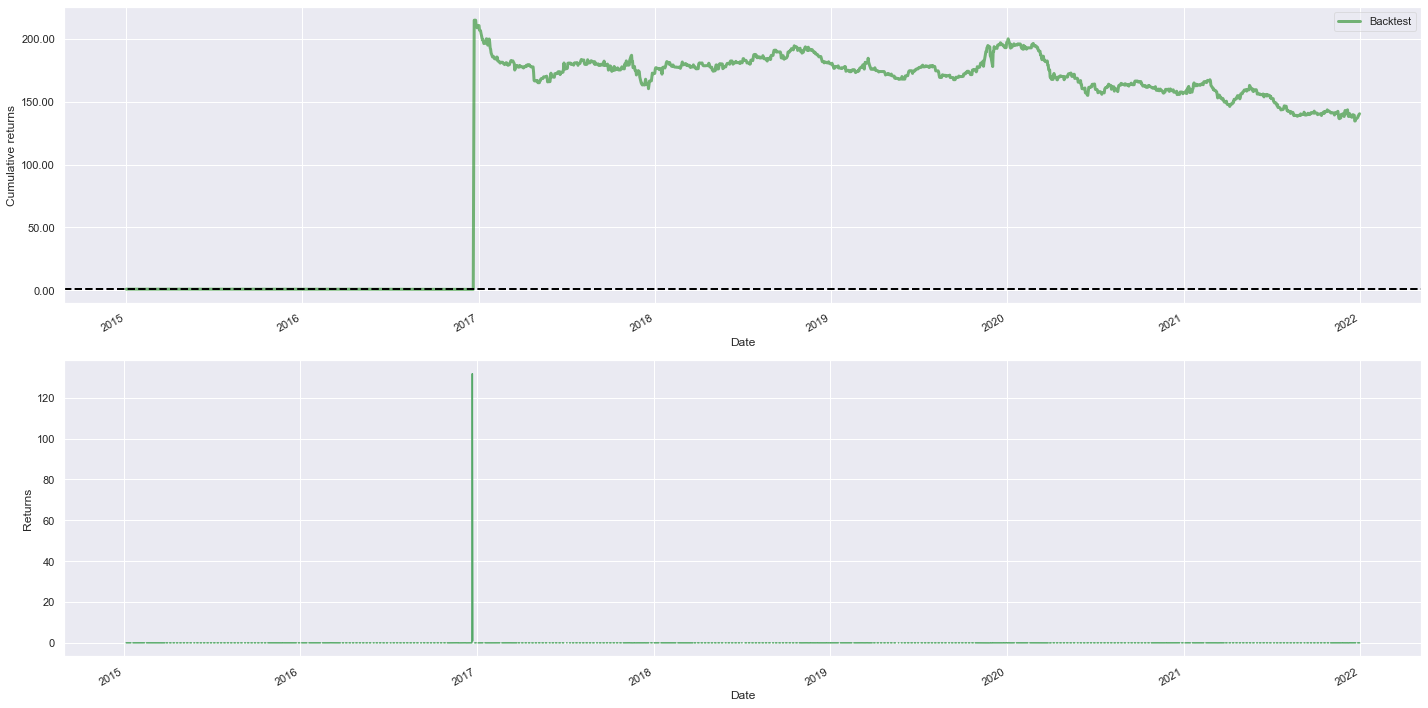

In [39]:
# Cumulative Returnsb
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(res)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plot_returns(res)
plt.tight_layout()


<AxesSubplot:xlabel='Date'>

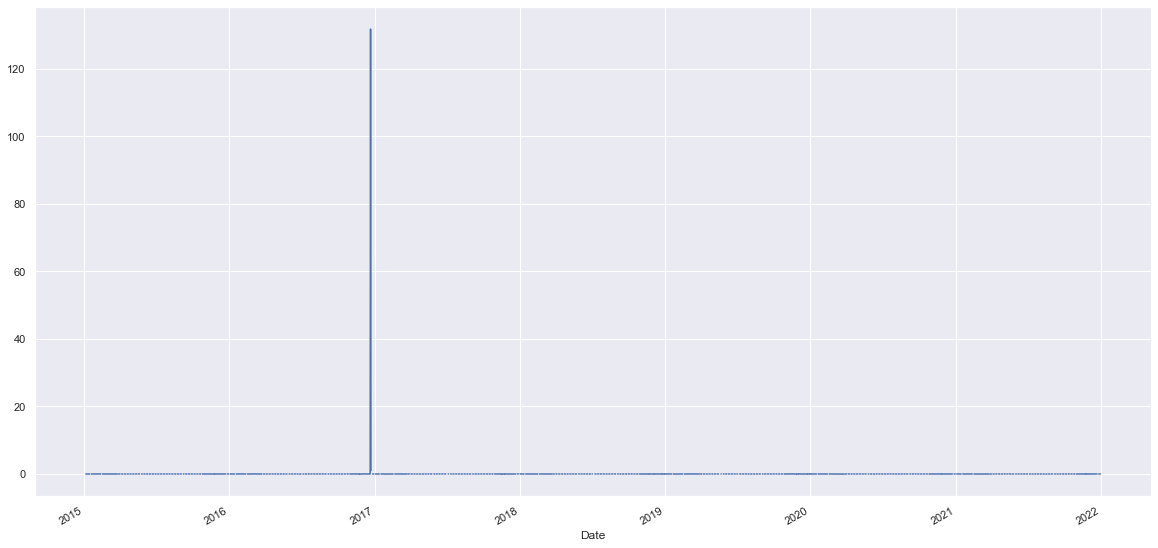

In [37]:
sns.set()
res.plot()

C:\Users\Hermes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<AxesSubplot:xlabel='Close'>

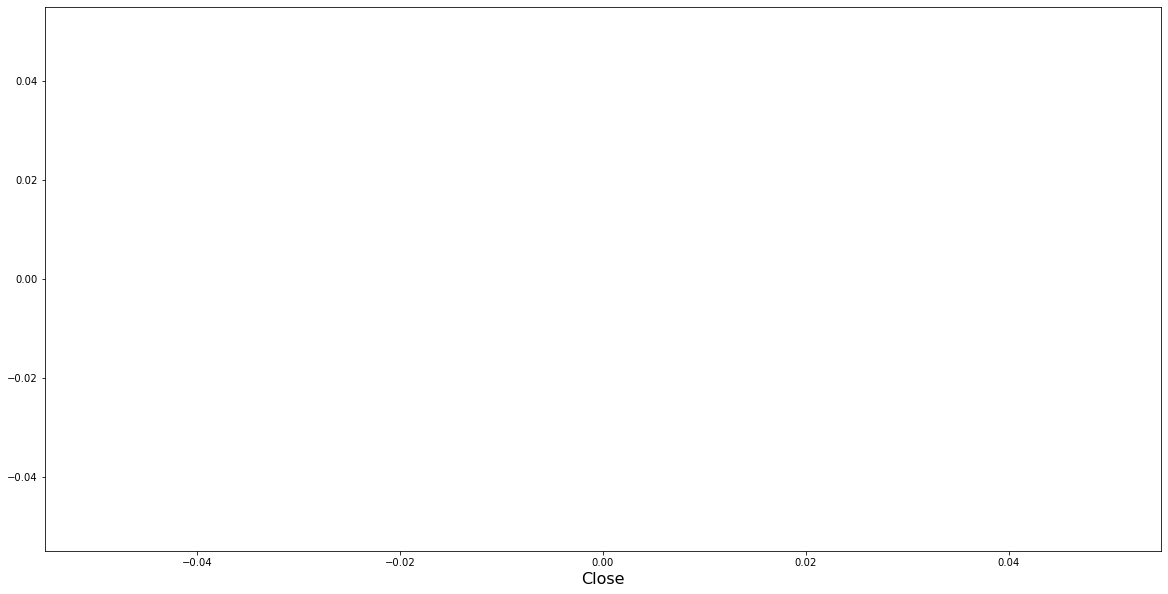

In [36]:
sns.lineplot(res.dropna().value_counts())

In [21]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

In [13]:
import seaborn as sns

C:\Users\Hermes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctio

C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: Runtim

C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\Users\Hermes\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1560: Runtim

<AxesSubplot:xlabel='Close'>

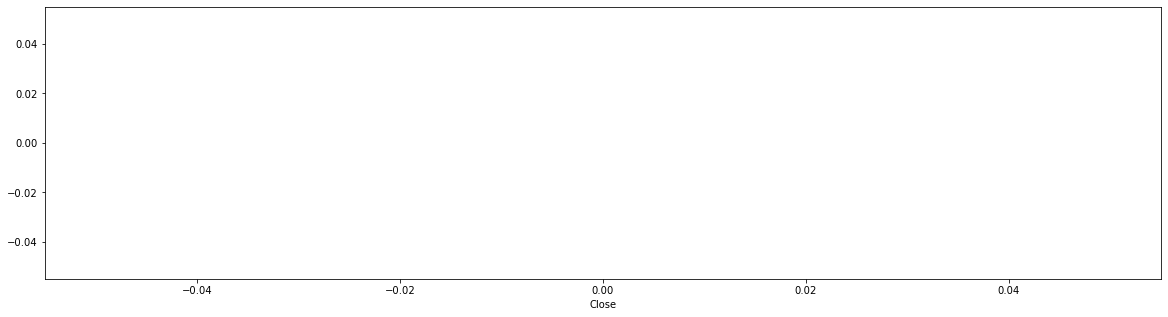

In [16]:
sns.lineplot(res.cumsum())

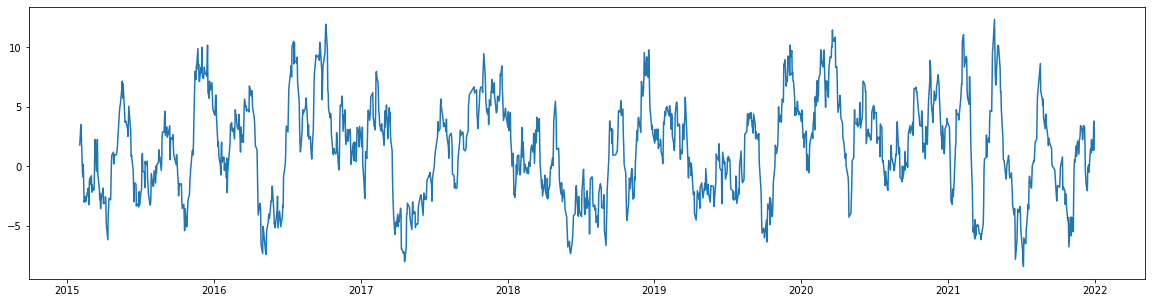

In [80]:
plt.plot(pf.timeseries.rolling_sharpe(res.dropna(),rolling_sharpe_window=20))

## Regression sinusoidale

<AxesSubplot:xlabel='Date'>

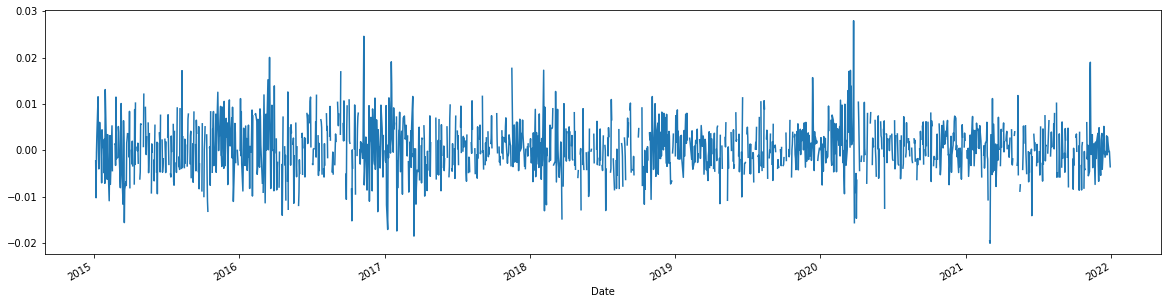

In [94]:
res.plot()

In [87]:
len(pf.timeseries.rolling_sharpe(res.dropna(),rolling_sharpe_window=20).tolist())

1514

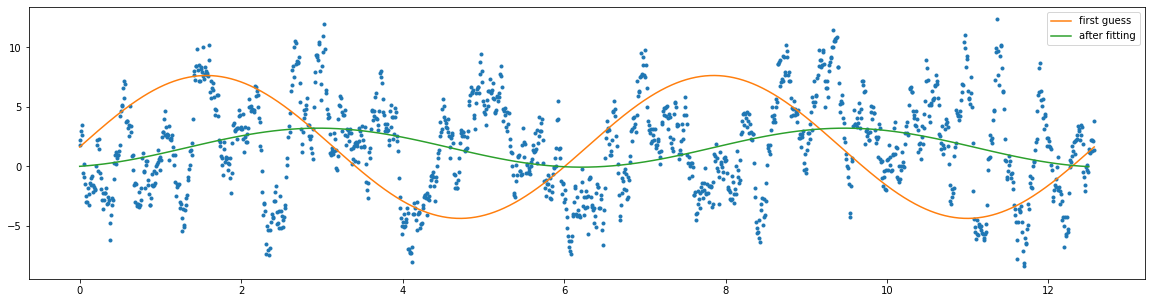

In [93]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt

N = 1495 # number of data points
t = np.linspace(0, 4*np.pi, N)
f = 1.15247 # Optional!! Advised not to use
data = pf.timeseries.rolling_sharpe(res.dropna(),rolling_sharpe_window=20).dropna().tolist() # create artificial data with noise

guess_mean = np.mean(data)
guess_std = 3*np.std(data)/(2**0.5)/(2**0.5)
guess_phase = 0
guess_freq = 1
guess_amp = 1

# we'll use this to plot our first estimate. This might already be good enough for you
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]

# recreate the fitted curve using the optimized parameters
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean

# recreate the fitted curve using the optimized parameters

fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

In [91]:
est_amp

nan

In [51]:
rub = web.DataReader('RUBUSD=X',"yahoo",start,end)["Close"]
xle = web.DataReader('XLE',"yahoo",start,end)["Close"]

signall = xle.diff().shift(1).dropna(axis=0) > 0
signals = -1 * (xle.diff().shift(1).dropna(axis=0) < 0)
signal = signals + signall
pct = rub.pct_change().dropna()
res = pct*signal

print("Return on 6 years : "+ str(100*res.sum())+" %")
print("Sharpe at : "+ str((252*res.mean())/(res.std()*252**0.5)))

print("Win rate de la stratégie : " + str(100*len(res[res>0])/len(res.dropna()))[:6]+ " %")
print("R:R ratio at : " + str(res[res>0].mean()/-res[res<0].mean())[:6])

Return on 6 years : 10458.552289946172 %
Sharpe at : 0.4168399856957015
Win rate de la stratégie : 54.896 %
R:R ratio at : 20.851


In [132]:
twd = web.DataReader('TWDCNY=X',"yahoo",start,end)["Close"]
smi = web.DataReader('SOXX',"yahoo",start,end)["Close"]

signall = smi.diff().shift(1).dropna(axis=0) > 0
signals = -1 * (smi.diff().shift(1).dropna(axis=0) < 0)
signal = signals + signall
pct = twd.pct_change().dropna()
res = pct*signal

print("Return on 6 years : "+ str(100*res.sum())+" %")
print("Sharpe at : "+ str((252*res.mean())/(res.std()*252**0.5)))

print("Win rate de la stratégie : " + str(100*len(res[res>0])/len(res.dropna()))[:6]+ " %")
print("R:R ratio at : " + str(res[res>0].mean()/-res[res<0].mean())[:6])

Return on 6 years : -10.92477274162318 %
Sharpe at : -0.16445603954579371
Win rate de la stratégie : 49.226 %
R:R ratio at : 0.9704


In [141]:
cny = web.DataReader('CNYUSD=X',"yahoo",start,end)["Close"]
chi = web.DataReader('CNYA',"yahoo",start,end)["Close"]

signall = chi.diff().shift(1).dropna(axis=0) > 0
signals = -1 * (chi.diff().shift(1).dropna(axis=0) < 0)
signal = signals + signall
pct = cny.pct_change().dropna()
res = pct*signal

print("Return on 6 years : "+ str(100*res.sum())+" %")
print("Sharpe at : "+ str((252*res.mean())/(res.std()*252**0.5)))

print("Win rate de la stratégie : " + str(100*len(res[res>0])/len(res.dropna()))[:6]+ " %")
print("R:R ratio at : " + str(res[res>0].mean()/-res[res<0].mean())[:6])

Return on 6 years : 21.698040608008817 %
Sharpe at : 1.1115358499716208
Win rate de la stratégie : 49.795 %
R:R ratio at : 1.0524


In [58]:
krw = web.DataReader('KRWUSD=X',"yahoo",start,end)["Close"]
kos = web.DataReader('^KS11',"yahoo",start,end)["Close"]

signall = kos.diff().shift(1).dropna(axis=0) > 0
signals = -1 * (kos.diff().shift(1).dropna(axis=0) < 0)
signal = signals + signall
pct = krw.pct_change().dropna()
res = pct*signal

print("Return on 6 years : "+ str(100*res.sum())+" %")
print("Sharpe at : "+ str((252*res.mean())/(res.std()*252**0.5)))

print("Win rate de la stratégie : " + str(100*len(res[res>0])/len(res.dropna()))[:6]+ " %")
print("R:R ratio at : " + str(res[res>0].mean()/-res[res<0].mean())[:6])

Return on 6 years : 73.13729430256856 %
Sharpe at : 1.446380596529671
Win rate de la stratégie : 53.434 %
R:R ratio at : 1.0919
